In [1]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

# Charger les données

In [2]:
def load_movies(path2data): # 1 classe par répertoire
    allmovtxts = [] # init vide
    allmovlabs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            movtxt = open(path2data+cl+'/'+f).read()
            allmovtxts.append(movtxt)
            allmovlabs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return allmovtxts,allmovlabs


def load_movietest(testfile):
    realmovtesttxts = []
    realmovtestlabs = []
    s=codecs.open(testfile, 'r','utf-8') 
    rmt=s.read()
    rmtt=rmt.split('\n')
    realmovtesttxts=np.array(rmtt)
    print("nombre de revues à prédire:", len(realmovtesttxts))
    realmovtestlabs=[-1]*len(realmovtesttxts)
    return realmovtesttxts,realmovtestlabs


In [3]:
path = "C:/Users/jacqueno/Documents/IODAA/Cours_IODAA/cours_ONTOTAL/TAL/tuto_TAL-main/notebooks/ressources/movies/movies1000/"
testfile="C:/Users/jacqueno/Documents/IODAA/Cours_IODAA/cours_ONTOTAL/TAL/tuto_TAL-main/notebooks/ressources/movies/testSentiment.txt"

allmovtxts,allmovlabs = load_movies(path)
realmovtesttxts_toolong,realmovtestlabs_toolong=load_movietest(testfile)



nombre de revues à prédire: 25001


#  Regarder à quoi ressemblent les revues et éliminer la denière ligne vide

In [4]:
print(len(allmovtxts),len(allmovlabs))
print(allmovtxts[0])
print(allmovlabs[0])
print(allmovtxts[-1])
print(allmovlabs[-1])

print(len(realmovtesttxts_toolong),len(realmovtestlabs_toolong))
print(realmovtesttxts_toolong[0])
print(realmovtestlabs_toolong[0])
print(realmovtesttxts_toolong[-2])
print(realmovtestlabs_toolong[-2])
realmovtesttxts=np.delete(realmovtesttxts_toolong, 25000, axis=0)
realmovtestlabs=np.delete(realmovtestlabs_toolong, 25000, axis=0)
print(len(realmovtesttxts),len(realmovtestlabs))
print(realmovtesttxts[-1])
print(realmovtestlabs[-1])


2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

25000 25000
This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.<br /><br />There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly cant understand how this type of nonsense gets produced and actually released, does somebody somewhere not at some stage think, 'Oh my god this really is a load of shite' and call it a day. Its crap like this that has people downloading illegally, the trailer looks like a completely different film, at least if you have download it, you haven't wasted your time or money Don't waste your time, this is painful.
-1


# Transformation paramétrique du texte

In [5]:
import unicodedata
import string

punc = string.punctuation  
punc += '\n\r\t'

for i in range(len(allmovtxts)):
    allmovtxts[i]= allmovtxts[i].lower()
    allmovtxts[i] = (allmovtxts[i]).translate(str.maketrans(punc, ' ' * len(punc)))  
    allmovtxts[i] = re.sub('[0-9]+', '', allmovtxts[i])
    allmovtxts[i] = unicodedata.normalize('NFD', allmovtxts[i]).encode('ascii', 'ignore').decode('utf-8')
print(allmovtxts[500])
# print(allmovtxts[1500])


for i in range(len(realmovtesttxts)):
    realmovtesttxts[i]= realmovtesttxts[i].lower()
    realmovtesttxts[i] = (realmovtesttxts[i]).translate(str.maketrans(punc, ' ' * len(punc)))  
    realmovtesttxts[i] = re.sub('[0-9]+', '', realmovtesttxts[i])
    realmovtesttxts[i] = unicodedata.normalize('NFD', realmovtesttxts[i]).encode('ascii', 'ignore').decode('utf-8')
# print(realmovtesttxts[500])


you always have to be careful with the first official studio release out of the gate each year    they re obviously films for which the studios have no great hopes   having missed both the deadline for academy award eligibility and the big box office holiday season      combine that with howie long s first starring action role   and you ve got a doozy of a movie that   while not as bad as it could have been   isn t a very good film    howie stars as an ace smokejumper   a firefighter who parachutes into forest fires unreachable from the ground      in the slightly contrived opening scenes   we witness his heroism in action   as he   and his mentor   played by scott glenn   attempt to rescue a small girl and her dog from an oncoming forest fire    william forsythe plays the bad guy   a mass murderer who has several million dollars tucked away to help fund his jailbreak    he   and five convict cohorts   manages to get selected for firefighting duty when a woodland blaze just happens to 

# Séparer le set en un ensemble de training et de test 
test set pour évaluer performance et définir hyperparamètres

In [6]:
# only one split between train/test
from sklearn.model_selection import train_test_split

traintxts, testtxts, trainlabs, testlabs = train_test_split(allmovtxts, allmovlabs, test_size=0.3, random_state=0) 
print("taille de l'ensemble de training:", len(traintxts))
print("taille de l'ensemble de test:", len(testtxts))

taille de l'ensemble de training: 1400
taille de l'ensemble de test: 600


# 1) Countvectorizer   - Jouer sur le Vocabulaire/taille du dictionnaire 
Définir les 100 mots les plus fréquents 
Tester différents countvectorizers: options par défaut, enlever des stop words, jouer sur la taille du dictionnaire avec max_df min_df

[('', 334240), ('the', 53422), ('a', 26393), ('and', 24884), ('of', 23619), ('to', 22107), ('is', 17548), ('in', 15261), ('s', 13077), ('it', 11202), ('that', 11125), ('as', 7876), ('with', 7467), ('for', 6935), ('film', 6692), ('this', 6678), ('his', 6586), ('i', 6099), ('he', 6083), ('but', 6016), ('on', 5087), ('are', 4856), ('t', 4442), ('by', 4303), ('be', 4264), ('one', 4083), ('movie', 4039), ('who', 3960), ('an', 3922), ('not', 3893), ('you', 3647), ('they', 3486), ('from', 3477), ('was', 3451), ('at', 3434), ('have', 3374), ('has', 3239), ('her', 3179), ('all', 3119), ('there', 2655), ('out', 2552), ('like', 2545), ('so', 2544), ('about', 2443), ('up', 2367), ('more', 2322), ('when', 2306), ('what', 2305), ('their', 2249), ('she', 2169), ('or', 2165), ('which', 2142), ('some', 2088), ('just', 2038), ('can', 2016), ('if', 1918), ('we', 1881), ('into', 1848), ('him', 1828), ('even', 1772), ('no', 1766), ('only', 1741), ('than', 1734), ('time', 1690), ('good', 1681), ('most', 161

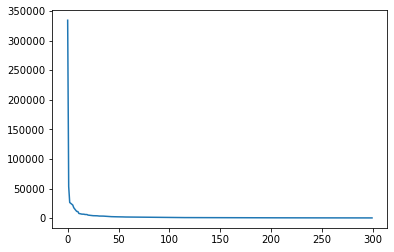

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# liste des mots les plus fréquents 
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
wc = Counter()
for text in (traintxts):
    wc.update(text.split(" "))
   
freq = [f for w,f in wc.most_common(300)]
plt.plot(freq[:300])
print(wc.most_common(100))
mostfreq=np.array((wc.most_common(100)))
print(mostfreq[:,0])
# définir la liste des 100 mots les plus fréquents pour les mettre dans stop words
array_sw=mostfreq[:,0]
list_sw=array_sw.tolist()
print(len(list_sw))

# Tester différents countvectorizers: options par défaut, enlever des stop words, jouer sur taille du dico avec max_df et min_df
vectorizer_0 = CountVectorizer()
Traintxts_0 = vectorizer_0.fit_transform(traintxts)
print(vectorizer_0.get_feature_names_out()[:20]) # we only print a few
dic_size = np.shape(Traintxts_0.toarray()[1])
print(dic_size)

vectorizer_1 = CountVectorizer(stop_words=list_sw) #enlever comme stopwords les 100 mots les plus fréquents
Traintxts_1 = vectorizer_1.fit_transform(traintxts)
print(vectorizer_1.get_feature_names_out()[:20]) # we only print a few
dic_size = np.shape(Traintxts_1.toarray()[1])
print(dic_size)

vectorizer_2 = CountVectorizer(max_df=0.3, min_df=5)
Traintxts_2 = vectorizer_2.fit_transform(traintxts)
print(vectorizer_2.get_feature_names_out()[:20]) 
dic_size = np.shape(Traintxts_2.toarray()[1])
print(dic_size)

# tester l'impact de la taille du dico (en jouant sur max_df et min_df) sur la performance de 3 classifieurs 

25
25


C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\657112706.py:111: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_pre_pos, 'go', marker="*", label="NB precision - pos class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\657112706.py:112: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_rec_pos, 'go', marker="x", label="NB recall - pos class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\657112706.py:113: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_f1_pos, 'go',  marker="+", label="NB f1 - pos class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\657112706.py:114: UserWarni

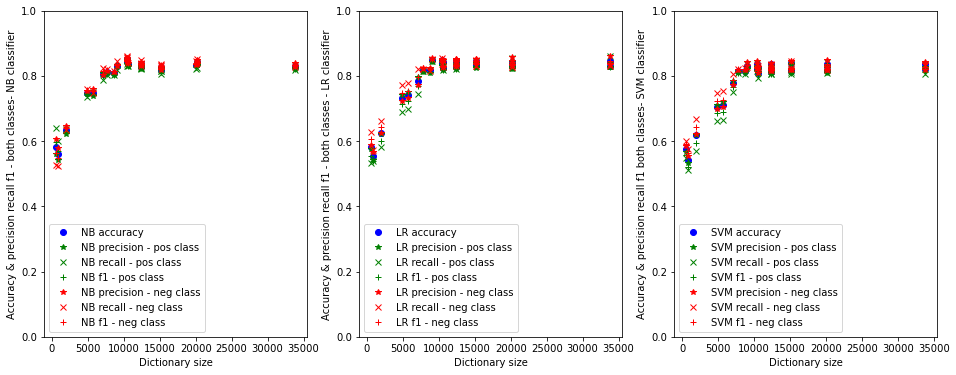

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

# counvectorizer tester différentes tailles de dictionnaire :

nb_clf = MultinomialNB()
lr_dicsize_clf = LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
svm_dicsize_clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
true=testlabs
list_maxdf=[]
list_mindf=[]
list_dicsize=[]   
list_nb_perf_acc=[]
list_nb_perf_pre_pos=[]
list_nb_perf_recall_pos=[]
list_nb_perf_f1_pos=[]
list_lr_perf_acc=[]
list_lr_perf_pre_pos=[]
list_lr_perf_recall_pos=[]
list_lr_perf_f1_pos=[]
list_svm_perf_acc=[]
list_svm_perf_pre_pos=[]
list_svm_perf_recall_pos=[]
list_svm_perf_f1_pos=[]
list_nb_perf_pre_neg=[]
list_nb_perf_recall_neg=[]
list_nb_perf_f1_neg=[]
list_lr_perf_pre_neg=[]
list_lr_perf_recall_neg=[]
list_lr_perf_f1_neg=[]
list_svm_perf_pre_neg=[]
list_svm_perf_recall_neg=[]
list_svm_perf_f1_neg=[]


# t=33793  nombre de mots dans le dictionnaire non modifié par max_df et min_df
max=(1, 0.8, 1, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7, 0.5, 0.5, 0.3, 0.3, 0.1, 0.1, 0.05, 0.02, 0.02, 0.008, 
     0.006, 0.005)
min=(1, 1, 2, 2, 3, 4, 2, 3, 4, 5, 5, 4, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 7)
print(len(max))
print(len(min))

for i in range(len(max)):
    list_maxdf.append(max[i])
    list_mindf.append(min[i])
    vectorizer_2_dicsize = CountVectorizer(max_df=float(max[i]), min_df=min[i]) #tester plusieurs valeurs de max_df min_df
    Traintxts_2_dicsize = vectorizer_2_dicsize.fit_transform(traintxts)
    dic_size = np.shape(Traintxts_2_dicsize.toarray()[1])
    list_dicsize.append(dic_size)  
    Testtxts_dicsize = vectorizer_2_dicsize.transform(testtxts)
#Naïve Bayes
    nb_clf.fit(Traintxts_2_dicsize, trainlabs)
    yhat_nb_dicsize = nb_clf.predict(Testtxts_dicsize)
    list_nb_perf_acc.append(accuracy_score(true, yhat_nb_dicsize))
    list_nb_perf_pre_pos.append(precision_score(true, yhat_nb_dicsize))
    list_nb_perf_recall_pos.append(recall_score(true, yhat_nb_dicsize))
    list_nb_perf_f1_pos.append(f1_score(true, yhat_nb_dicsize))
    list_nb_perf_pre_neg.append(precision_score(true, yhat_nb_dicsize, pos_label=0))
    list_nb_perf_recall_neg.append(recall_score(true, yhat_nb_dicsize, pos_label=0))
    list_nb_perf_f1_neg.append(f1_score(true, yhat_nb_dicsize, pos_label=0))
# Logistic Regression
    lr_dicsize_clf.fit(Traintxts_2_dicsize, trainlabs)
    yhat_lr_dicsize=lr_dicsize_clf.predict(Testtxts_dicsize) 
    list_lr_perf_acc.append(accuracy_score(true, yhat_lr_dicsize))
    list_lr_perf_pre_pos.append(precision_score(true, yhat_lr_dicsize))
    list_lr_perf_recall_pos.append(recall_score(true, yhat_lr_dicsize))
    list_lr_perf_f1_pos.append(f1_score(true, yhat_lr_dicsize))
    list_lr_perf_pre_neg.append(precision_score(true, yhat_lr_dicsize, pos_label=0))
    list_lr_perf_recall_neg.append(recall_score(true, yhat_lr_dicsize, pos_label=0))
    list_lr_perf_f1_neg.append(f1_score(true, yhat_lr_dicsize, pos_label=0))
# Linear SVM
    svm_dicsize_clf.fit(Traintxts_2_dicsize, trainlabs)
    yhat_svm_dicsize=svm_dicsize_clf.predict(Testtxts_dicsize)
    list_svm_perf_acc.append(accuracy_score(true, yhat_svm_dicsize))
    list_svm_perf_pre_pos.append(precision_score(true, yhat_svm_dicsize))
    list_svm_perf_recall_pos.append(recall_score(true, yhat_svm_dicsize))
    list_svm_perf_f1_pos.append(f1_score(true, yhat_svm_dicsize))
    list_svm_perf_pre_neg.append(precision_score(true, yhat_svm_dicsize, pos_label=0))
    list_svm_perf_recall_neg.append(recall_score(true, yhat_svm_dicsize, pos_label=0))
    list_svm_perf_f1_neg.append(f1_score(true, yhat_svm_dicsize, pos_label=0))


li=(list_maxdf, list_mindf, list_dicsize, list_nb_perf_acc, list_nb_perf_pre_pos, list_nb_perf_recall_pos, list_nb_perf_f1_pos,
    list_lr_perf_acc, list_lr_perf_pre_pos, list_lr_perf_recall_pos, list_lr_perf_f1_pos, list_svm_perf_acc, 
    list_svm_perf_pre_pos, list_svm_perf_recall_pos, list_svm_perf_f1_pos, list_nb_perf_pre_neg, list_nb_perf_recall_neg, 
    list_nb_perf_f1_neg, list_lr_perf_pre_neg, list_lr_perf_recall_neg, list_lr_perf_f1_neg, list_svm_perf_pre_neg, 
    list_svm_perf_recall_neg, list_svm_perf_f1_neg)
for k in li:
    k=np.array(k)

x=list_dicsize
ynb_acc=list_nb_perf_acc
ynb_pre_pos=list_nb_perf_pre_pos
ynb_rec_pos=list_nb_perf_recall_pos
ynb_f1_pos=list_nb_perf_f1_pos
ynb_pre_neg=list_nb_perf_pre_neg
ynb_rec_neg=list_nb_perf_recall_neg
ynb_f1_neg=list_nb_perf_f1_neg
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.ylabel('Accuracy & precision recall f1 - both classes- NB classifier') 
plt.xlabel('Dictionary size')
plt.plot(x, ynb_acc, 'bo', label="NB accuracy")
plt.plot(x, ynb_pre_pos, 'go', marker="*", label="NB precision - pos class")
plt.plot(x, ynb_rec_pos, 'go', marker="x", label="NB recall - pos class")
plt.plot(x, ynb_f1_pos, 'go',  marker="+", label="NB f1 - pos class")
plt.plot(x, ynb_pre_neg, 'ro', marker="*", label="NB precision - neg class")
plt.plot(x, ynb_rec_neg, 'ro', marker="x", label="NB recall - neg class")
plt.plot(x, ynb_f1_neg, 'ro',  marker="+", label="NB f1 - neg class")
plt.legend(["NB accuracy", "NB precision - pos class", "NB recall - pos class", "NB f1 - pos class", 
            "NB precision - neg class", "NB recall - neg class", "NB f1 - neg class"])
plt.ylim([0, 1])
ylr_acc=list_lr_perf_acc
ylr_pre_pos=list_lr_perf_pre_pos
ylr_rec_pos=list_lr_perf_recall_pos
ylr_f1_pos=list_lr_perf_f1_pos
ylr_pre_neg=list_lr_perf_pre_neg
ylr_rec_neg=list_lr_perf_recall_neg
ylr_f1_neg=list_lr_perf_f1_neg
plt.subplot(132)
plt.ylabel('Accuracy & precision recall f1 - both classes - LR classifier') 
plt.xlabel('Dictionary size')
plt.plot(x, ylr_acc, 'bo', label="LR accuracy ")
plt.plot(x, ylr_pre_pos, 'go', marker="*", label="LR precision - pos class")
plt.plot(x, ylr_rec_pos, 'go', marker="x", label="LR recall - pos class")
plt.plot(x, ylr_f1_pos, 'go',  marker="+", label="LR f1 - pos class")
plt.plot(x, ylr_pre_neg, 'ro', marker="*", label="LR precision - neg class")
plt.plot(x, ylr_rec_neg, 'ro', marker="x", label="LR recall - neg class")
plt.plot(x, ylr_f1_neg, 'ro',  marker="+", label="LR f1 - neg class")
plt.legend(["LR accuracy", "LR precision - pos class", "LR recall - pos class", "LR f1 - pos class", 
            "LR precision - neg class", "LR recall - neg class", "LR f1 - neg class"])
plt.ylim([0, 1])
ysvm_acc=list_svm_perf_acc
ysvm_pre_pos=list_svm_perf_pre_pos
ysvm_rec_pos=list_svm_perf_recall_pos
ysvm_f1_pos=list_svm_perf_f1_pos
ysvm_pre_neg=list_svm_perf_pre_neg
ysvm_rec_neg=list_svm_perf_recall_neg
ysvm_f1_neg=list_svm_perf_f1_neg
plt.subplot(133)
plt.ylabel('Accuracy & precision recall f1 both classes- SVM classifier') 
plt.xlabel('Dictionary size')
plt.plot(x, ysvm_acc, 'bo', label="LR accuracy")
plt.plot(x, ysvm_pre_pos, 'go', marker="*", label="LR precision - pos class")
plt.plot(x, ysvm_rec_pos, 'go', marker="x", label="LR recall - pos class")
plt.plot(x, ysvm_f1_pos, 'go',  marker="+", label="LR f1 - pos class")
plt.plot(x, ysvm_pre_neg, 'ro', marker="*", label="LR precision - neg class")
plt.plot(x, ysvm_rec_neg, 'ro', marker="x", label="LR recall - neg class")
plt.plot(x, ysvm_f1_neg, 'ro',  marker="+", label="LR f1 - neg class")
plt.legend(["SVM accuracy", "SVM precision - pos class", "SVM recall - pos class", "SVM f1 - pos class", 
            "SVM precision - neg class", "SVM recall - neg class", "SVM f1 - neg class"])
plt.ylim([0, 1])
plt.show()



# Tester les hyperparamètres des 3 classifieurs et performance associée
### (après application du vectorizer_2 qui a été choisi à l'étape précédente avec max_df 0.3 et min_df 5):  

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vectorizer_2 = CountVectorizer(max_df=0.3, min_df=5)
Traintxts_2 = vectorizer_2.fit_transform(traintxts)
true=testlabs
Testtxts = vectorizer_2.transform(testtxts)

#Naïve Bayes
nb_clf = MultinomialNB()
nb_clf.fit(Traintxts_2, trainlabs)
yhat_nb = nb_clf.predict(Testtxts)
tn, fp, fn, tp = confusion_matrix(true, yhat_nb).ravel()
print("NB precision & recall positive and precision & recall negative:", "\n", tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))    
print("Naïve Bayes accuracy, precision, recall & f1- positive class:", accuracy_score(true, yhat_nb), 
      precision_score(true, yhat_nb), recall_score(true, yhat_nb), f1_score(true, yhat_nb))


listlra_l2_lib=[]
lra_l2_lib_2_classes=np.zeros((9,4))
listlra_l1_lib=[]
lra_l1_lib_2_classes=np.zeros((9,4))
listlra_l2_lbfgs=[]
lra_l2_lbfgs_2_classes=np.zeros((9,4))
listsvma=[]
svma_2_classes=np.zeros((9,4))
C_value=[]
n=0
for i in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:    
    C_value.append(i)   
# Logistic Regression
    lr_l2_lib_clf = LogisticRegression(penalty='l2', random_state=0, C=i, solver='liblinear',n_jobs=1)
    lr_l2_lib_clf.fit(Traintxts_2, trainlabs)
    yhat_lr_l2_lib=lr_l2_lib_clf.predict(Testtxts) 
    lra_l2_lib=[accuracy_score(true, yhat_lr_l2_lib), precision_score(true, yhat_lr_l2_lib), recall_score(true, yhat_lr_l2_lib), f1_score(true, yhat_lr_l2_lib)]
    listlra_l2_lib.append(lra_l2_lib)
    tn, fp, fn, tp = confusion_matrix(true, yhat_lr_l2_lib).ravel()
    lra_l2_lib_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp)) 
# Logistic Regression
    lr_l1_lib_clf = LogisticRegression(penalty='l1', random_state=0, C=i, solver='liblinear',n_jobs=1)
    lr_l1_lib_clf.fit(Traintxts_2, trainlabs)
    yhat_lr_l1_lib=lr_l1_lib_clf.predict(Testtxts) 
    lra_l1_lib=[accuracy_score(true, yhat_lr_l1_lib), precision_score(true, yhat_lr_l1_lib), recall_score(true, yhat_lr_l1_lib), f1_score(true, yhat_lr_l1_lib)]
    listlra_l1_lib.append(lra_l1_lib)
    tn, fp, fn, tp = confusion_matrix(true, yhat_lr_l1_lib).ravel()
    lra_l1_lib_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))
# Logistic Regression
    lr_clf_l2_lbfgs = LogisticRegression(random_state=0, C=i, solver='lbfgs',n_jobs=1)
    lr_clf_l2_lbfgs.fit(Traintxts_2, trainlabs)
    yhat_lr_l2_lbfgs=lr_clf_l2_lbfgs.predict(Testtxts) 
    lra_l2_lbfgs=[accuracy_score(true, yhat_lr_l2_lbfgs), precision_score(true, yhat_lr_l2_lbfgs), recall_score(true, yhat_lr_l2_lbfgs), f1_score(true, yhat_lr_l2_lbfgs)]
    listlra_l2_lbfgs.append(lra_l2_lbfgs)
    tn, fp, fn, tp = confusion_matrix(true, yhat_lr_l2_lbfgs).ravel()
    lra_l2_lbfgs_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))
# Linear SVM
    svm_clf = LinearSVC(random_state=0, C=i, tol=1e-5, max_iter=10000)
    svm_clf.fit(Traintxts_2, trainlabs)
    yhat_svm=svm_clf.predict(Testtxts)
    svma=[accuracy_score(true, yhat_svm), precision_score(true, yhat_svm), recall_score(true, yhat_svm), f1_score(true, yhat_svm) ]
    listsvma.append(svma)
    tn, fp, fn, tp = confusion_matrix(true, yhat_svm).ravel()
    svma_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))    
    n+=1
    
C_value=np.array(C_value)
listlra_l2_lib=np.array(listlra_l2_lib)
listlra_l1_lib=np.array(listlra_l1_lib)
listlra_l2_lbfgs=np.array(listlra_l2_lbfgs)
listsvma=np.array(listsvma)
print("\nC values tested:", C_value)
print("\nLog Regression liblinear l2 : accuracy, precision, recall & f1 - positive class- for diff. values of C:", "\n", listlra_l2_lib)
print("\nLog Regression liblinear l1 : accuracy, precision, recall & f1 positive class- for diff. values of C:", "\n", listlra_l1_lib)
print("\nLog Regression lbfgs l2 : accuracy, precision & recall & f1 positive class- for diff. values of C:", "\n", listlra_l2_lbfgs)
print("\nSVM accuracy, precision recall & f1 positive class- for diff. values of C:", "\n", listsvma)
print("\nC values tested:", C_value)
print("\nLog Regression liblinear l2 precision & recall positive and precision & recall negative:", "\n", lra_l2_lib_2_classes)
print("\nLog Regression liblinear l1 precision & recall positive and precision & recall negative:", "\n", lra_l1_lib_2_classes)
print("\nLog Regression lbfgs l2 precision & recall positive and precision & recall negative:", "\n", lra_l2_lbfgs_2_classes)
print("\nSVM precision & recall positive and precision & recall negative:", "\n", svma_2_classes)


NB precision & recall positive and precision & recall negative: 
 0.8442906574394463 0.8356164383561644 0.8456591639871383 0.8538961038961039
Naïve Bayes accuracy, precision, recall & f1- positive class: 0.845 0.8442906574394463 0.8356164383561644 0.8399311531841652


C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\379217057.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  lra_l1_lib_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\379217057.py:60: RuntimeWarning: invalid value encountered in longlong_scalars
  lra_l2_lbfgs_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))
C:\Users\jacqueno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,


C values tested: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]

Log Regression liblinear l2 : accuracy, precision, recall & f1 - positive class- for diff. values of C: 
 [[0.55666667 0.52355072 0.98972603 0.68483412]
 [0.67666667 0.60792952 0.94520548 0.73994638]
 [0.81333333 0.77272727 0.87328767 0.81993569]
 [0.845      0.83056478 0.85616438 0.84317032]
 [0.85666667 0.85273973 0.85273973 0.85273973]
 [0.85166667 0.84175084 0.85616438 0.84889643]
 [0.84666667 0.83557047 0.85273973 0.8440678 ]
 [0.84666667 0.83783784 0.84931507 0.84353741]
 [0.83333333 0.82432432 0.83561644 0.82993197]]

Log Regression liblinear l1 : accuracy, precision, recall & f1 positive class- for diff. values of C: 
 [[0.51333333 0.         0.         0.        ]
 [0.51333333 0.         0.         0.        ]
 [0.51333333 0.         0.         0.        ]
 [0.51333333 0.         0.         0.        ]
 [0.785      0.75548589 0.82534247 0.7888707 ]
 [0.79       0.78040541 0.79109589 0.78571429]

C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\2501209835.py:44: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_lr_l2_lib_pos, y_lr_l2_lib_pos, 'go', marker="x", label="logistic regression l2 liblinear")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\2501209835.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_lr_l2_lib_neg, y_lr_l2_lib_neg, 'ro', marker="x", label="logistic regression l2 liblinear")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\2501209835.py:52: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_lr_l1_lib_pos, y_lr_l1_lib_pos, 'go', marker="+", label="logistic regression l1 libl

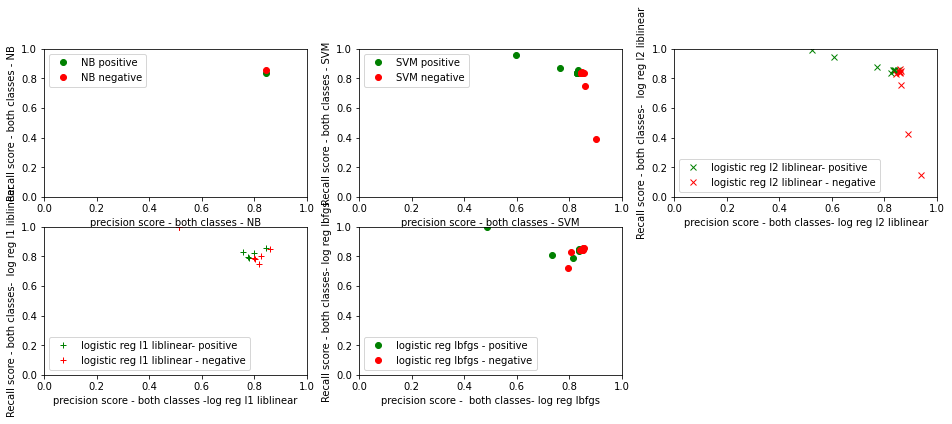

In [10]:
from matplotlib import pyplot as plt
# plot precision en fonction de recall pour chacun des 3 classifieurs NB, LR et SVM
xnb_pos=precision_score(true, yhat_nb)
ynb_pos=recall_score(true, yhat_nb)
xnb_neg=precision_score(true, yhat_nb, pos_label=0)
ynb_neg=recall_score(true, yhat_nb, pos_label=0)

x_lr_l2_lib_pos=lra_l2_lib_2_classes[:,0]
y_lr_l2_lib_pos=lra_l2_lib_2_classes[:,1]
x_lr_l2_lib_neg=lra_l2_lib_2_classes[:,2]
y_lr_l2_lib_neg=lra_l2_lib_2_classes[:,3]
x_lr_l1_lib_pos=lra_l1_lib_2_classes[:,0]
y_lr_l1_lib_pos=lra_l1_lib_2_classes[:,1]
x_lr_l1_lib_neg=lra_l1_lib_2_classes[:,2]
y_lr_l1_lib_neg=lra_l1_lib_2_classes[:,3]
x_lr_l2_lbfgs_pos=lra_l2_lbfgs_2_classes[:,0]
y_lr_l2_lbfgs_pos=lra_l2_lbfgs_2_classes[:,1]
x_lr_l2_lbfgs_neg=lra_l2_lbfgs_2_classes[:,2]
y_lr_l2_lbfgs_neg=lra_l2_lbfgs_2_classes[:,3]
xsvm_pos=svma_2_classes[:,0]
ysvm_pos=svma_2_classes[:,1]
xsvm_neg=svma_2_classes[:,2]
ysvm_neg=svma_2_classes[:,3]
plt.figure(figsize=(16, 6))
plt.subplot(231)
plt.ylabel('Recall score - both classes - NB') 
plt.xlabel('precision score - both classes - NB')
plt.plot(xnb_pos, ynb_pos, 'go', label="NB")
plt.plot(xnb_neg, ynb_neg, 'ro', label="NB")
plt.legend(["NB positive", "NB negative"])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.subplot(232)
plt.ylabel('Recall score - both classes - SVM') 
plt.xlabel('precision score - both classes - SVM')
plt.plot(xsvm_pos, ysvm_pos, 'go', label="SVM")
plt.plot(xsvm_neg, ysvm_neg, 'ro', label="SVM")
plt.legend(["SVM positive", "SVM negative"])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.subplot(233)
plt.ylabel('Recall score - both classes-  log reg l2 liblinear') 
plt.xlabel('precision score - both classes- log reg l2 liblinear')
plt.plot(x_lr_l2_lib_pos, y_lr_l2_lib_pos, 'go', marker="x", label="logistic regression l2 liblinear")
plt.plot(x_lr_l2_lib_neg, y_lr_l2_lib_neg, 'ro', marker="x", label="logistic regression l2 liblinear")
plt.legend(["logistic reg l2 liblinear- positive", "logistic reg l2 liblinear - negative"])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.subplot(234)
plt.ylabel('Recall score - both classes-  log reg l1 liblinear') 
plt.xlabel('precision score - both classes -log reg l1 liblinear')
plt.plot(x_lr_l1_lib_pos, y_lr_l1_lib_pos, 'go', marker="+", label="logistic regression l1 liblinear")
plt.plot(x_lr_l1_lib_neg, y_lr_l1_lib_neg, 'ro', marker="+", label="logistic regression l1 liblinear")
plt.legend(["logistic reg l1 liblinear- positive", "logistic reg l1 liblinear - negative"])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.subplot(235)
plt.ylabel('Recall score - both classes- log reg lbfgs') 
plt.xlabel('precision score -  both classes- log reg lbfgs')
plt.plot(x_lr_l2_lbfgs_pos, y_lr_l2_lbfgs_pos, 'go', label="logistic regression lbfgs")
plt.plot(x_lr_l2_lbfgs_neg, y_lr_l2_lbfgs_neg, 'ro', label="logistic regression lbfgs")
plt.legend(["logistic reg lbfgs - positive", "logistic reg lbfgs - negative"])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()



# 2) Tester TF IDF et classifieur SVM 
##sur la base de bonnes performances sur movies d'après littérature

tester impact de la taille du dictionnaire (max_df min_df) et N-grams
puis après sélection d'une taille de dictionnaire et Ngrams, tester valeurs de C (hyperparamètres classifieur ) 

25
25
maxdf= 1 mindf= 1 	 pre&rec pos	: 0.8649 0.8767 	 pre&rec neg	: 0.8816 0.8701
maxdf= 0.8 mindf= 1 	 pre&rec pos	: 0.8682 0.8801 	 pre&rec neg	: 0.8849 0.8734
maxdf= 1 mindf= 2 	 pre&rec pos	: 0.8678 0.8767 	 pre&rec neg	: 0.8820 0.8734
maxdf= 0.9 mindf= 2 	 pre&rec pos	: 0.8673 0.8733 	 pre&rec neg	: 0.8791 0.8734
maxdf= 0.9 mindf= 3 	 pre&rec pos	: 0.8591 0.8767 	 pre&rec neg	: 0.8808 0.8636
maxdf= 0.9 mindf= 4 	 pre&rec pos	: 0.8644 0.8733 	 pre&rec neg	: 0.8787 0.8701
maxdf= 0.8 mindf= 2 	 pre&rec pos	: 0.8703 0.8733 	 pre&rec neg	: 0.8795 0.8766
maxdf= 0.8 mindf= 3 	 pre&rec pos	: 0.8620 0.8767 	 pre&rec neg	: 0.8812 0.8669
maxdf= 0.8 mindf= 4 	 pre&rec pos	: 0.8615 0.8733 	 pre&rec neg	: 0.8783 0.8669
maxdf= 0.8 mindf= 5 	 pre&rec pos	: 0.8664 0.8664 	 pre&rec neg	: 0.8734 0.8734
maxdf= 0.7 mindf= 5 	 pre&rec pos	: 0.8690 0.8630 	 pre&rec neg	: 0.8710 0.8766
maxdf= 0.7 mindf= 4 	 pre&rec pos	: 0.8547 0.8664 	 pre&rec neg	: 0.8717 0.8604
maxdf= 0.7 mindf= 3 	 pre&rec pos	: 0.

C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\1562773581.py:72: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_pre_pos, 'go', marker="*", label="SVM precision - positive class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\1562773581.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_rec_pos, 'go', marker="x", label="SVM recall - positive class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\1562773581.py:74: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, ynb_f1_pos, 'go',  marker="+", label="SVM f1 - positive class")
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\156277358

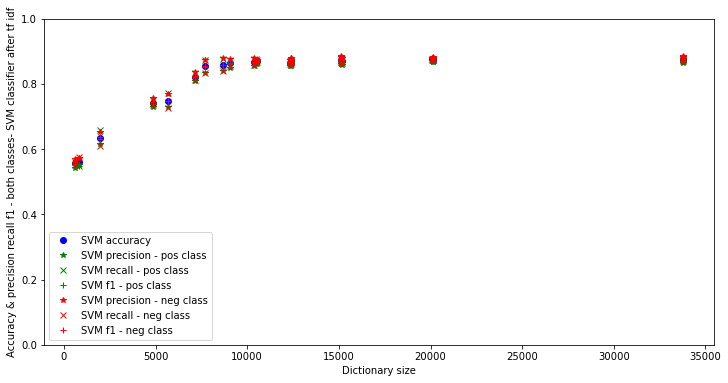

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=testlabs

svm_tf_clf = LinearSVC(random_state=0, tol=1e-5, C=1, max_iter=10000)
true=testlabs
list_maxdf_tf=[]
list_mindf_tf=[]
list_dicsize_tf=[]
list_svm_tf_perf_acc=[]
list_svm_tf_perf_pre_pos=[]
list_svm_tf_perf_recall_pos=[]
list_svm_tf_perf_f1_pos=[]
list_svm_tf_perf_pre_neg=[]
list_svm_tf_perf_recall_neg=[]
list_svm_tf_perf_f1_neg=[]

max=(1, 0.8, 1, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7, 0.5, 0.5, 0.3, 0.3, 0.1, 0.1, 0.05, 0.02, 0.02, 0.008, 0.006, 0.005)
min=(1, 1, 2, 2, 3, 4, 2, 3, 4, 5, 5, 4, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 7)
print(len(max))
print(len(min))

for i in range (len(max)):
    list_maxdf_tf.append(max[i])
    list_mindf_tf.append(min[i])
    vectorizer_tf=  TfidfVectorizer(ngram_range=(1,1), max_df=float(max[i]), min_df=min[i], binary=true) #tester plusieurs valeurs de max_df min_df
    Traintxts_tf = vectorizer_tf.fit_transform(traintxts)
    dic_size_tf = np.shape(Traintxts_tf.toarray()[1])
    list_dicsize_tf.append(dic_size_tf)  
    Testtxts_tf = vectorizer_tf.transform(testtxts)
# Linear SVM
    svm_tf_clf.fit(Traintxts_tf, trainlabs)
    yhat_svm_tf=svm_tf_clf.predict(Testtxts_tf)
    list_svm_tf_perf_acc.append(accuracy_score(true, yhat_svm_tf))
    list_svm_tf_perf_pre_pos.append(precision_score(true, yhat_svm_tf))
    list_svm_tf_perf_recall_pos.append(recall_score(true, yhat_svm_tf))
    list_svm_tf_perf_f1_pos.append(f1_score(true, yhat_svm_tf))
    list_svm_tf_perf_pre_neg.append(precision_score(true, yhat_svm_tf, pos_label=0))
    list_svm_tf_perf_recall_neg.append(recall_score(true, yhat_svm_tf, pos_label=0))
    list_svm_tf_perf_f1_neg.append(f1_score(true, yhat_svm_tf, pos_label=0))
    tn, fp, fn, tp = confusion_matrix(true, yhat_svm_tf).ravel()
    print ("maxdf=", max[i], "mindf=", min[i], "\t pre&rec pos\t: {0:.4f}".format(tp/(tp+fp)), "{0:.4f}".format(tp/(tp+fn)), 
           "\t pre&rec neg\t: {0:.4f}".format(tn/(tn+fn)), "{0:.4f}".format(tn/(tn+fp)))    

li=(list_maxdf_tf, list_mindf_tf, list_dicsize_tf, list_svm_tf_perf_acc, list_svm_tf_perf_pre_pos, list_svm_tf_perf_recall_pos, 
list_svm_tf_perf_f1_pos, list_svm_tf_perf_pre_neg, list_svm_tf_perf_recall_neg, list_svm_tf_perf_f1_neg)
for k in li:
    k=np.array(k)


#regarder séparément accucaracy et metrics pour la classe positive
print("accuracy, precision recall and f1 scores - positive class\n")
print(np.vstack((list_svm_tf_perf_acc, list_svm_tf_perf_pre_pos, list_svm_tf_perf_recall_pos, list_svm_tf_perf_f1_pos)))


#regarder performance pour les 2 classes
x=list_dicsize_tf
ynb_acc=list_svm_tf_perf_acc
ynb_pre_pos=list_svm_tf_perf_pre_pos
ynb_rec_pos=list_svm_tf_perf_recall_pos
ynb_f1_pos=list_svm_tf_perf_f1_pos
ynb_pre_neg=list_svm_tf_perf_pre_neg
ynb_rec_neg=list_svm_tf_perf_recall_neg
ynb_f1_neg=list_svm_tf_perf_f1_neg

plt.figure(figsize=(12, 6))
plt.subplot()
plt.ylabel('Accuracy & precision recall f1 - both classes- SVM classifier after tf idf') 
plt.xlabel('Dictionary size')
plt.plot(x, ynb_acc, 'bo', label="SVM accuracy")
plt.plot(x, ynb_pre_pos, 'go', marker="*", label="SVM precision - positive class")
plt.plot(x, ynb_rec_pos, 'go', marker="x", label="SVM recall - positive class")
plt.plot(x, ynb_f1_pos, 'go',  marker="+", label="SVM f1 - positive class")
plt.plot(x, ynb_pre_neg, 'ro', marker="*", label="SVM precision - neg class")
plt.plot(x, ynb_rec_neg, 'ro', marker="x", label="SVM recall - neg class")
plt.plot(x, ynb_f1_neg, 'ro',  marker="+", label="SVM f1 - neg class")
plt.legend(["SVM accuracy", "SVM precision - pos class", "SVM recall - pos class", "SVM f1 - pos class", 
            "SVM precision - neg class", "SVM recall - neg class", "SVM f1 - neg class"])

plt.ylim([0, 1])
plt.show()




In [12]:
# Tester les hyperparamètres de SVM (valeur de C)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=testlabs
vectorizer_tf= TfidfVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2, binary=true) 
Traintxts_tf = vectorizer_tf.fit_transform(traintxts)

listsvm_tf=[]
svm_tf_2_classes=np.zeros((9,4))
C_value=[]
n=0
for i in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:    
    C_value.append(i)   
    # Linear SVM
    svm_tf_clf = LinearSVC(random_state=0, C=i, tol=1e-5, max_iter=10000)
    Testtxts_tf = vectorizer_tf.transform(testtxts)   
    svm_tf_clf.fit(Traintxts_tf, trainlabs)
    yhat_svm=svm_tf_clf.predict(Testtxts_tf)
    svm_tf=[accuracy_score(true, yhat_svm), precision_score(true, yhat_svm), recall_score(true, yhat_svm), f1_score(true, yhat_svm) ]
    listsvm_tf.append(svm_tf)
    tn, fp, fn, tp = confusion_matrix(true, yhat_svm).ravel()
    svm_tf_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))    
    n+=1
    
C_value=np.array(C_value)
listsvm_tf=np.array(listsvm_tf)
#regarder séparément accucaracy et metrics pour la classe positive
print("\nC values tested:", C_value)
print("\n SVM accuracy, precision, recall & f1 - positive class for diff. values of C:", "\n", listsvm_tf)
#regarder performance pour les 2 classes
print("\nC values tested:", C_value)
print("\nSVM precision & recall for positive and precision & recall for negative:", "\n", svm_tf_2_classes)

C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\625489399.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  svm_tf_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))
C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\625489399.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  svm_tf_2_classes[n,:]=(tp/(tp+fp), tp/(tp+fn), tn/(tn+fn), tn/(tn+fp))



C values tested: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]

 SVM accuracy, precision, recall & f1 - positive class for diff. values of C: 
 [[0.48666667 0.48666667 1.         0.65470852]
 [0.48666667 0.48666667 1.         0.65470852]
 [0.49166667 0.48911223 1.         0.65691789]
 [0.805      0.74238227 0.91780822 0.82082695]
 [0.855      0.83171521 0.88013699 0.85524126]
 [0.875      0.87030717 0.87328767 0.87179487]
 [0.86666667 0.8630137  0.8630137  0.8630137 ]
 [0.86666667 0.86551724 0.85958904 0.86254296]
 [0.86666667 0.86551724 0.85958904 0.86254296]]

C values tested: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]

SVM precision & recall for positive and precision & recall for negative: 
 [[0.48666667 1.                nan 0.        ]
 [0.48666667 1.                nan 0.        ]
 [0.48911223 1.         1.         0.00974026]
 [0.74238227 0.91780822 0.89958159 0.69805195]
 [0.83171521 0.88013699 0.87972509 0.83116883]
 [0.87030717 0.873

# Classifieur sélectionné (SVM) avec ses hyperparamètres (C) après TF-IDF: performances sur le set de test

In [13]:
vectorizer_tf=  TfidfVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2, binary=true) 
Traintxts_tf = vectorizer_tf.fit_transform(traintxts)
dic_size_tf = np.shape(Traintxts_tf.toarray()[1])
print(dic_size_tf)
    
true=testlabs
Testtxts_tf = vectorizer_tf.transform(testtxts)
svm_tf_clf = LinearSVC(random_state=0, tol=1e-5, C=1, max_iter=10000)
svm_tf_clf.fit(Traintxts_tf, trainlabs)
yhat_svm_tf=svm_tf_clf.predict(Testtxts_tf)
print("\n selected classifier SVM after TFIDF : accuracy", accuracy_score(true, yhat_svm_tf))
print("\n selected classifier SVM after TFIDF : precision, recall, et f1 scores positive class:", "\n", 
      precision_score(true, yhat_svm_tf), "\n", recall_score(true, yhat_svm_tf), "\n", f1_score(true, yhat_svm_tf))
print("\n selected classifier SVM after TFIDF : precision, recall, et f1 scores negative class:", "\n", 
       precision_score(true, yhat_svm_tf, pos_label=0), "\n", recall_score(true, yhat_svm_tf, pos_label=0), 
       "\n", f1_score(true, yhat_svm_tf, pos_label=0))


(20104,)

 selected classifier SVM after TFIDF : accuracy 0.875

 selected classifier SVM after TFIDF : precision, recall, et f1 scores positive class: 
 0.8703071672354948 
 0.8732876712328768 
 0.8717948717948719

 selected classifier SVM after TFIDF : precision, recall, et f1 scores negative class: 
 0.8794788273615635 
 0.8766233766233766 
 0.8780487804878049


# Mots positifs et négatifs associés au modèle séléctionné (SVM)  après TFIDF 

In [14]:
# Look at highest feature coefficients and the words associated (most positive words)
features = {v:k for k,v in vectorizer_tf.vocabulary_.items()} 
#for the model we selected which is SVM C=1 
svm_tf_clf = LinearSVC(random_state=0, tol=1e-5, C=1, max_iter=10000)
svm_tf_clf.fit(Traintxts_tf, trainlabs)
dico=dict()
feat = svm_tf_clf.coef_[0] 
for i in range(len(features)):
    dico[features[i]]=feat[i]
Orderdict_pos=dict(sorted(dico.items(), key=lambda item: item[1], reverse=True))
Orderdict_neg=dict(sorted(dico.items(), key=lambda item: item[1]))
import itertools
out_pos = dict(itertools.islice(Orderdict_pos.items(), 50)) 
out_neg = dict(itertools.islice(Orderdict_neg.items(), 50)) 
print("Mots positifs:\n", out_pos.keys())
print("\nMots négatifs:\n", out_neg.keys())


Mots positifs:
 dict_keys(['perfect', 'memorable', 'terrific', 'excellent', 'performances', 'hilarious', 'wonderfully', 'others', 'enjoyed', 'today', 'realistic', 'especially', 'works', 'job', 'definitely', 'outstanding', 'fun', 'sometimes', 'overall', 'perfectly', 'town', 'enjoyable', 'witty', 'effective', 'very', 'extremely', 'yet', 'subtle', 'above', 'well', 'great', 'solid', 'simple', 've', 'masterpiece', 'seen', 'performance', 'loved', 'highly', 'similar', 'brilliant', 'refreshing', 'breathtaking', 'class', 'different', 'makes', 'respectively', 'delivers', 'pace', 'beings'])

Mots négatifs:
 dict_keys(['worst', 'bad', 'boring', 'awful', 'unfortunately', 'nothing', 'mess', 'lame', 'ridiculous', 'supposed', 'stupid', 'bland', 'poor', 'waste', 'wasted', 'anyway', 'attempt', 'worse', 'script', 'plot', 'poorly', 'flat', 'laughable', 'dull', 'terrible', 'tries', 'reason', 'only', 'maybe', 'fails', 'unfunny', 'none', 'point', 'should', 'falls', 'screenplay', 'potential', 'attempts', 'pro

# Utilisation du modèle sélectionné (SVM après TF IDF) pour prédiction  sur le fichier TestSentiment

In [15]:
# after selection of the classifier and performance on validation set, predict for Real test 
Real_test =  vectorizer_tf.transform(realmovtesttxts)
svm_tf_clf = LinearSVC(random_state=0, tol=1e-5, C=1, max_iter=10000)
svm_tf_clf.fit(Traintxts_tf, trainlabs)
ypred_real_test = svm_tf_clf.predict(Real_test)
pred_real_test= ypred_real_test.astype(np.float)
lignes_positive=np.where(pred_real_test==1.0, 1, 0)
lignes_negative=np.where(pred_real_test==0, 1, 0)
print("nombre de revues positives:", np.sum(lignes_positive))
print("nombre de revues négatives:", np.sum(lignes_negative))
print("nombre total de revues:", np.shape(realmovtestlabs)) 
for i in range ((np.shape(realmovtesttxts)[0])-1):
    realmovtestlabs[i]=pred_real_test[i]
print("100 premières prédictions:\n", realmovtestlabs[:100])
np.savetxt('test_movies_prediction.txt', realmovtestlabs)



nombre de revues positives: 11157
nombre de revues négatives: 13843
nombre total de revues: (25000,)
100 premières prédictions:
 [1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1]


C:\Users\jacqueno\AppData\Local\Temp\ipykernel_65376\3991846107.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_real_test= ypred_real_test.astype(np.float)
